In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [70]:
def load_and_mean(file_path, var):
    """
    Load a dataset from a NetCDF file and compute the mean for a specified variable.
    
    Parameters:
        file_path (str): Path to the NetCDF file containing the dataset.
        var (str): Name of the variable in the dataset for which the mean is to be computed.
        
    Returns:
        mean_data (xarray.DataArray): The mean values of the specified variable.
    """
    ds = xr.open_dataset(file_path)
    mean_data = ds[var]
    return mean_data, ds['xt_ocean'], ds['yt_ocean']

# List of periods and variables
periods = ['GW1p2', 'GW2p0', 'GW3p0']
base_period = 'GW1p2'
variables = ['duration', 'magnitude']

# Template for the file paths
file_template = "/g/data/xv83/users/ep5799/Heatwaves/{period}_mhw.nc"

# Load datasets and compute means
means = {}
coords = {}
for period in periods:
    for var in variables:
        file_path = file_template.format(period=period)
        mean_data, lon, lat = load_and_mean(file_path, var)
        means[(var, period)] = mean_data
        coords[(var, period)] = (lon, lat)

In [71]:
# Determine the color scales for each variable
color_scales = {}
for var in variables:
    all_data = np.concatenate([means[(var, period)].values.flatten() for period in periods])
    color_scales[var] = (np.nanmin(all_data), np.nanmax(all_data))

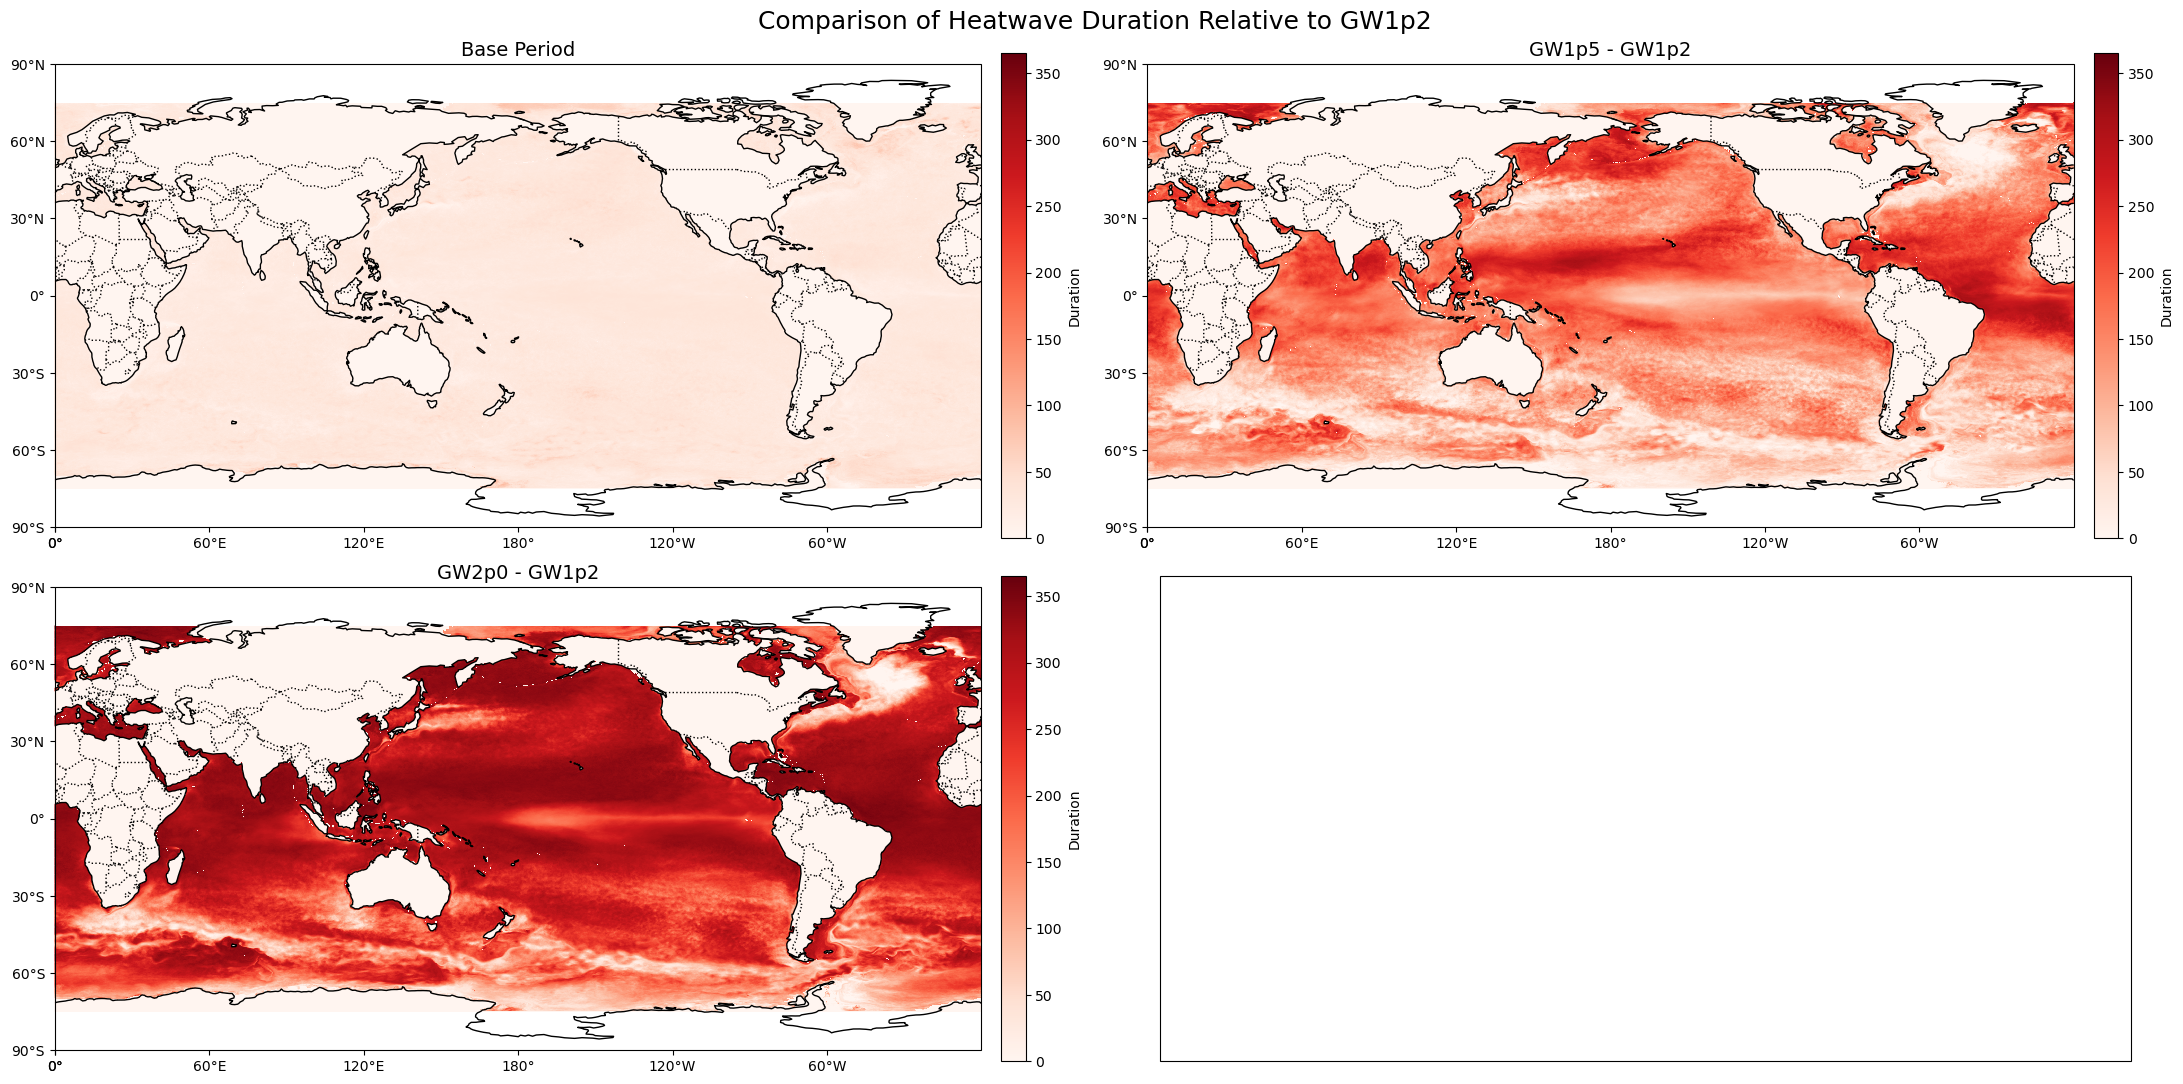

<Figure size 640x480 with 0 Axes>

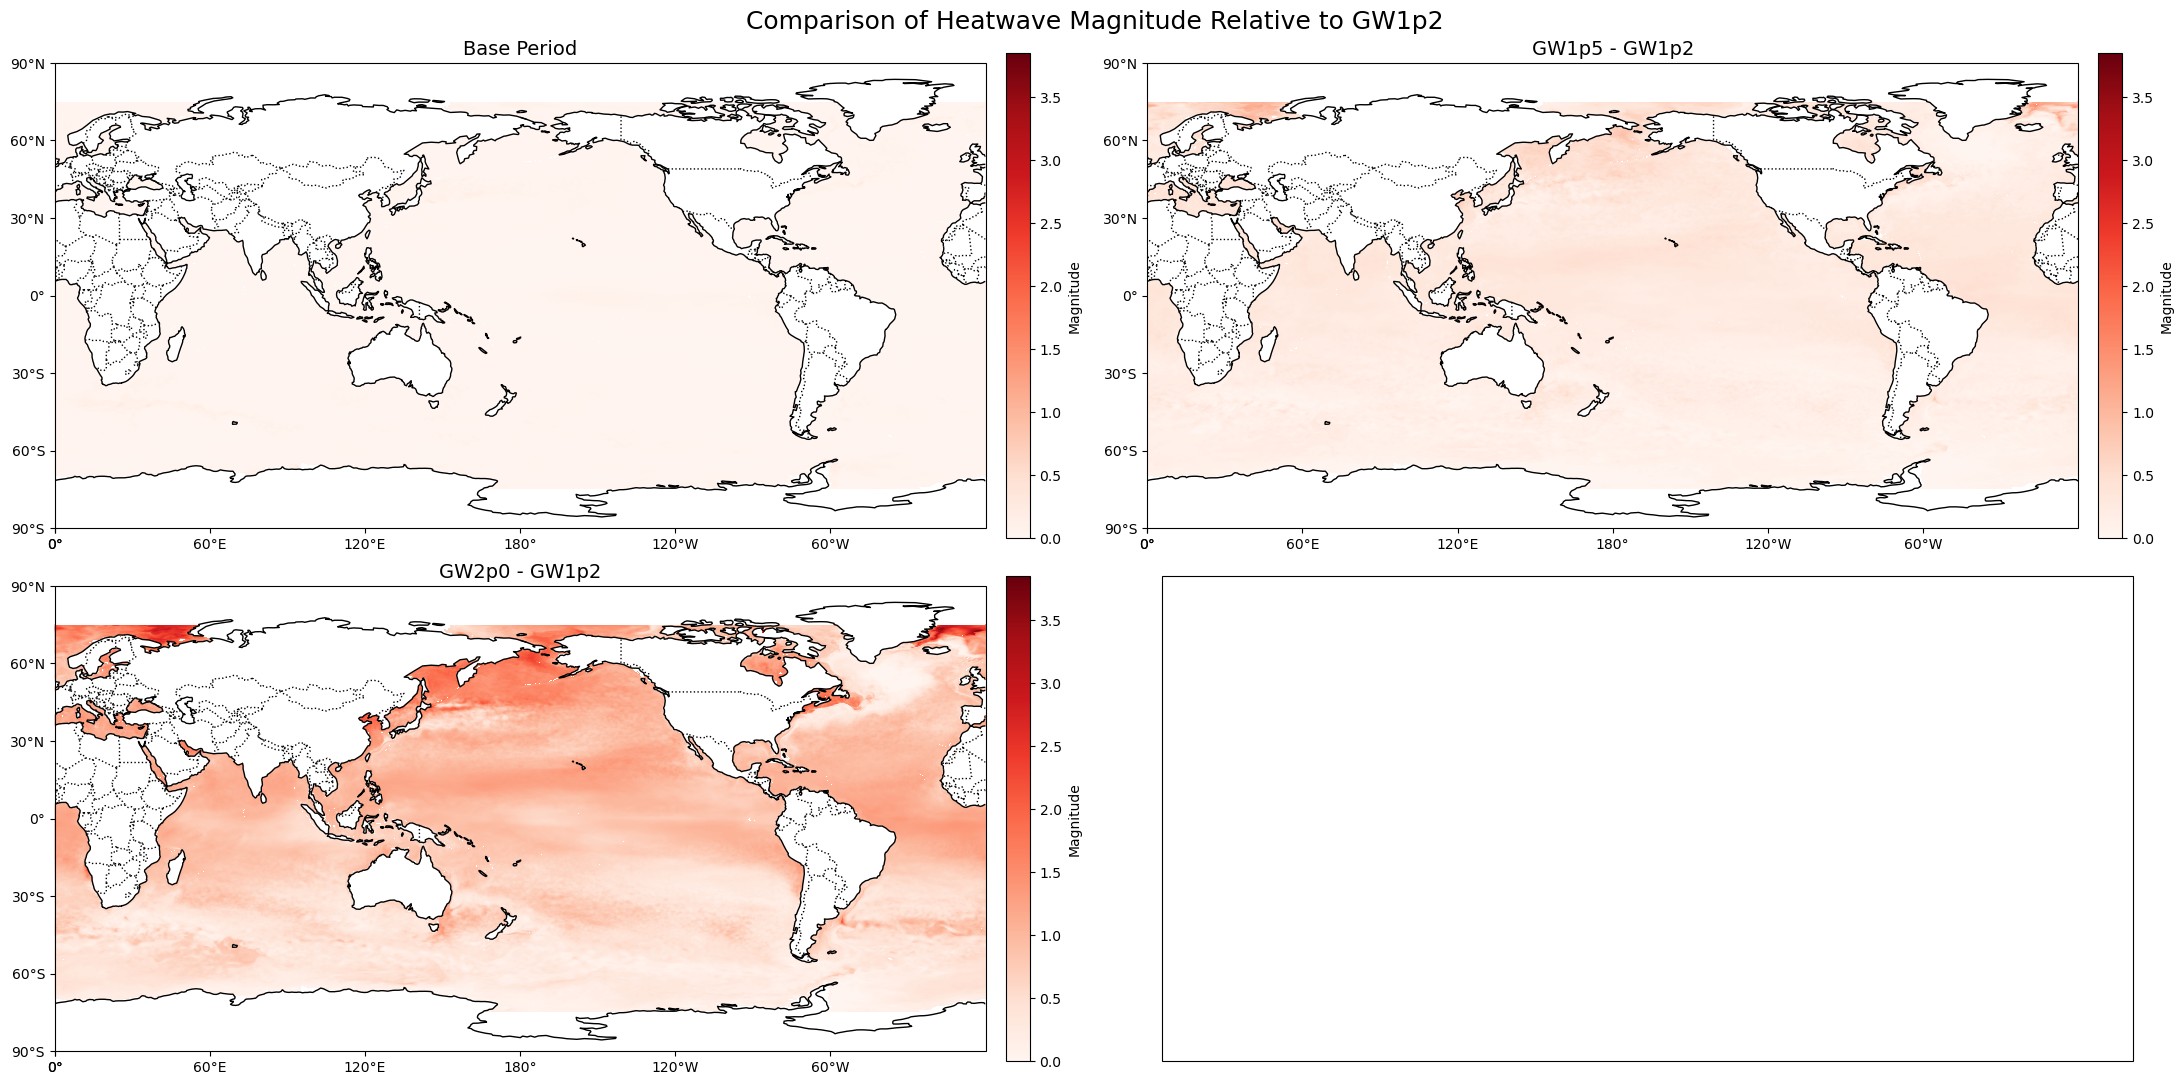

<Figure size 640x480 with 0 Axes>

In [74]:
def subplots_variable(means, coords, color_scales, variable, title):
    """
    Create subplots for a specified variable relative to the base period.

    Parameters:
        means (dict): Dictionary with keys as (variable, period) and values as xarray.DataArray of means.
        coords (dict): Dictionary with keys as (variable, period) and values as tuples of longitude and latitude coordinates.
        color_scales (dict): Dictionary with color scales for each variable.
        variable (str): The variable ('duration' or 'magnitude') to plot.
        title (str): The title for the plot.
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 11), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
    fig.suptitle(title, fontsize=18)

    vmin, vmax = color_scales[variable]

    for ax, period, subplot_title in zip([ax1, ax2, ax3, ax4], periods, ['Base Period', 'GW1p5 - GW1p2', 'GW2p0 - GW1p2', 'GW3p0 - GW1p2']):
        if period == base_period:
            data = means[(variable, period)]
        else:
            data = means[(variable, period)] - means[(variable, base_period)]
       
        lon, lat = coords[(variable, period)]

        # Ensure the data is 2D
        if len(data.shape) == 2 and data.shape == (lat.size, lon.size):
            img = ax.pcolormesh(lon, lat, data, cmap="Reds", vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
        else:
            raise ValueError(f"Data shape {data.shape} does not match coordinates shape {(lat.size, lon.size)}")

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.set_title(subplot_title, fontsize=14)
        
        # Set ticks and labels for latitude and longitude
        ax.set_xticks(np.arange(0, 361, 60), crs=ccrs.PlateCarree())
        ax.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W', '0°'])
        ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
        ax.set_yticklabels(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N'])

        cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.02, fraction=0.05)
        cbar.set_label(variable.capitalize())

    plt.tight_layout()
    plt.show()
    plt.savefig(f'{variable}.png')

# Plotting
subplots_variable(means, coords, color_scales, 'duration', 'Comparison of Heatwave Duration Relative to GW1p2')
subplots_variable(means, coords, color_scales, 'magnitude', 'Comparison of Heatwave Magnitude Relative to GW1p2')

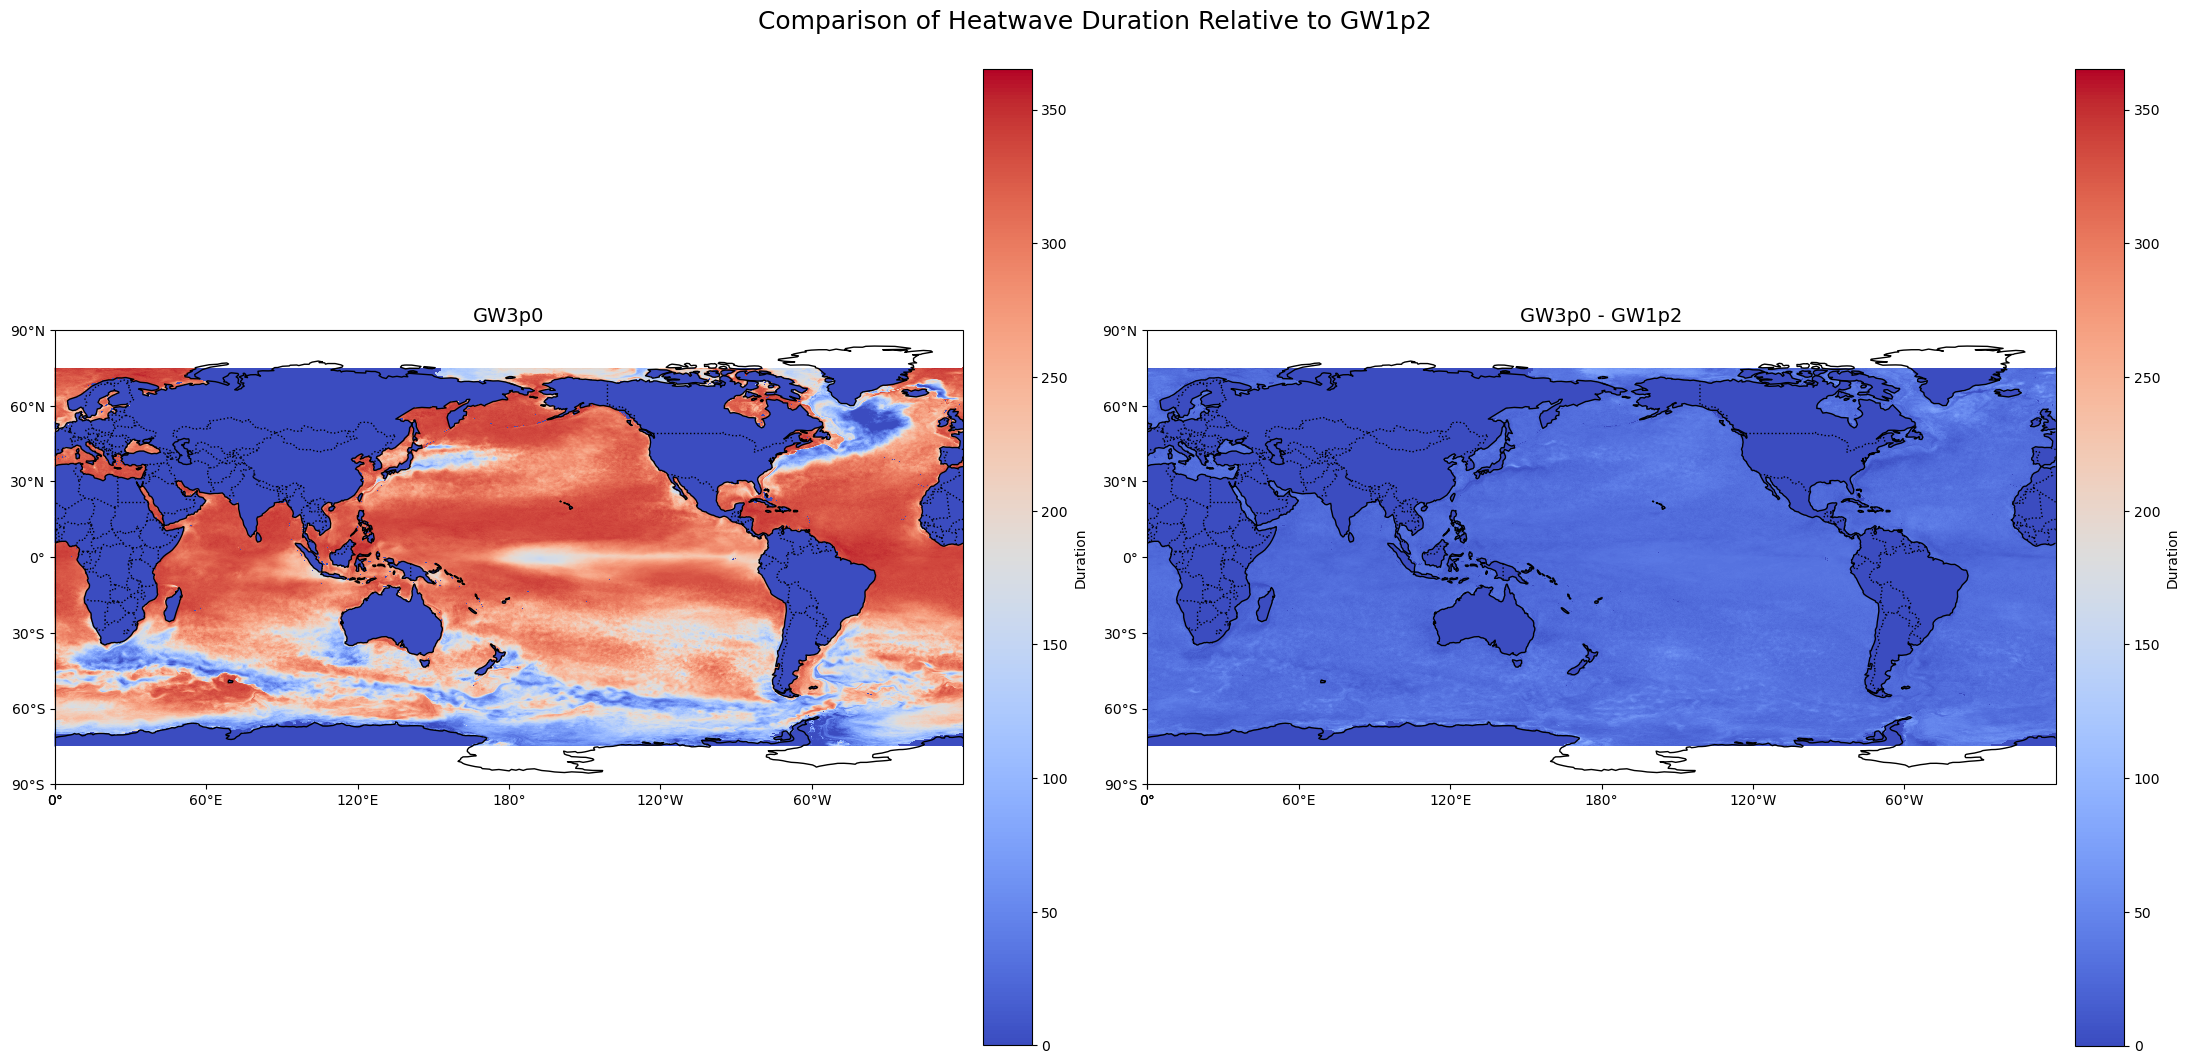

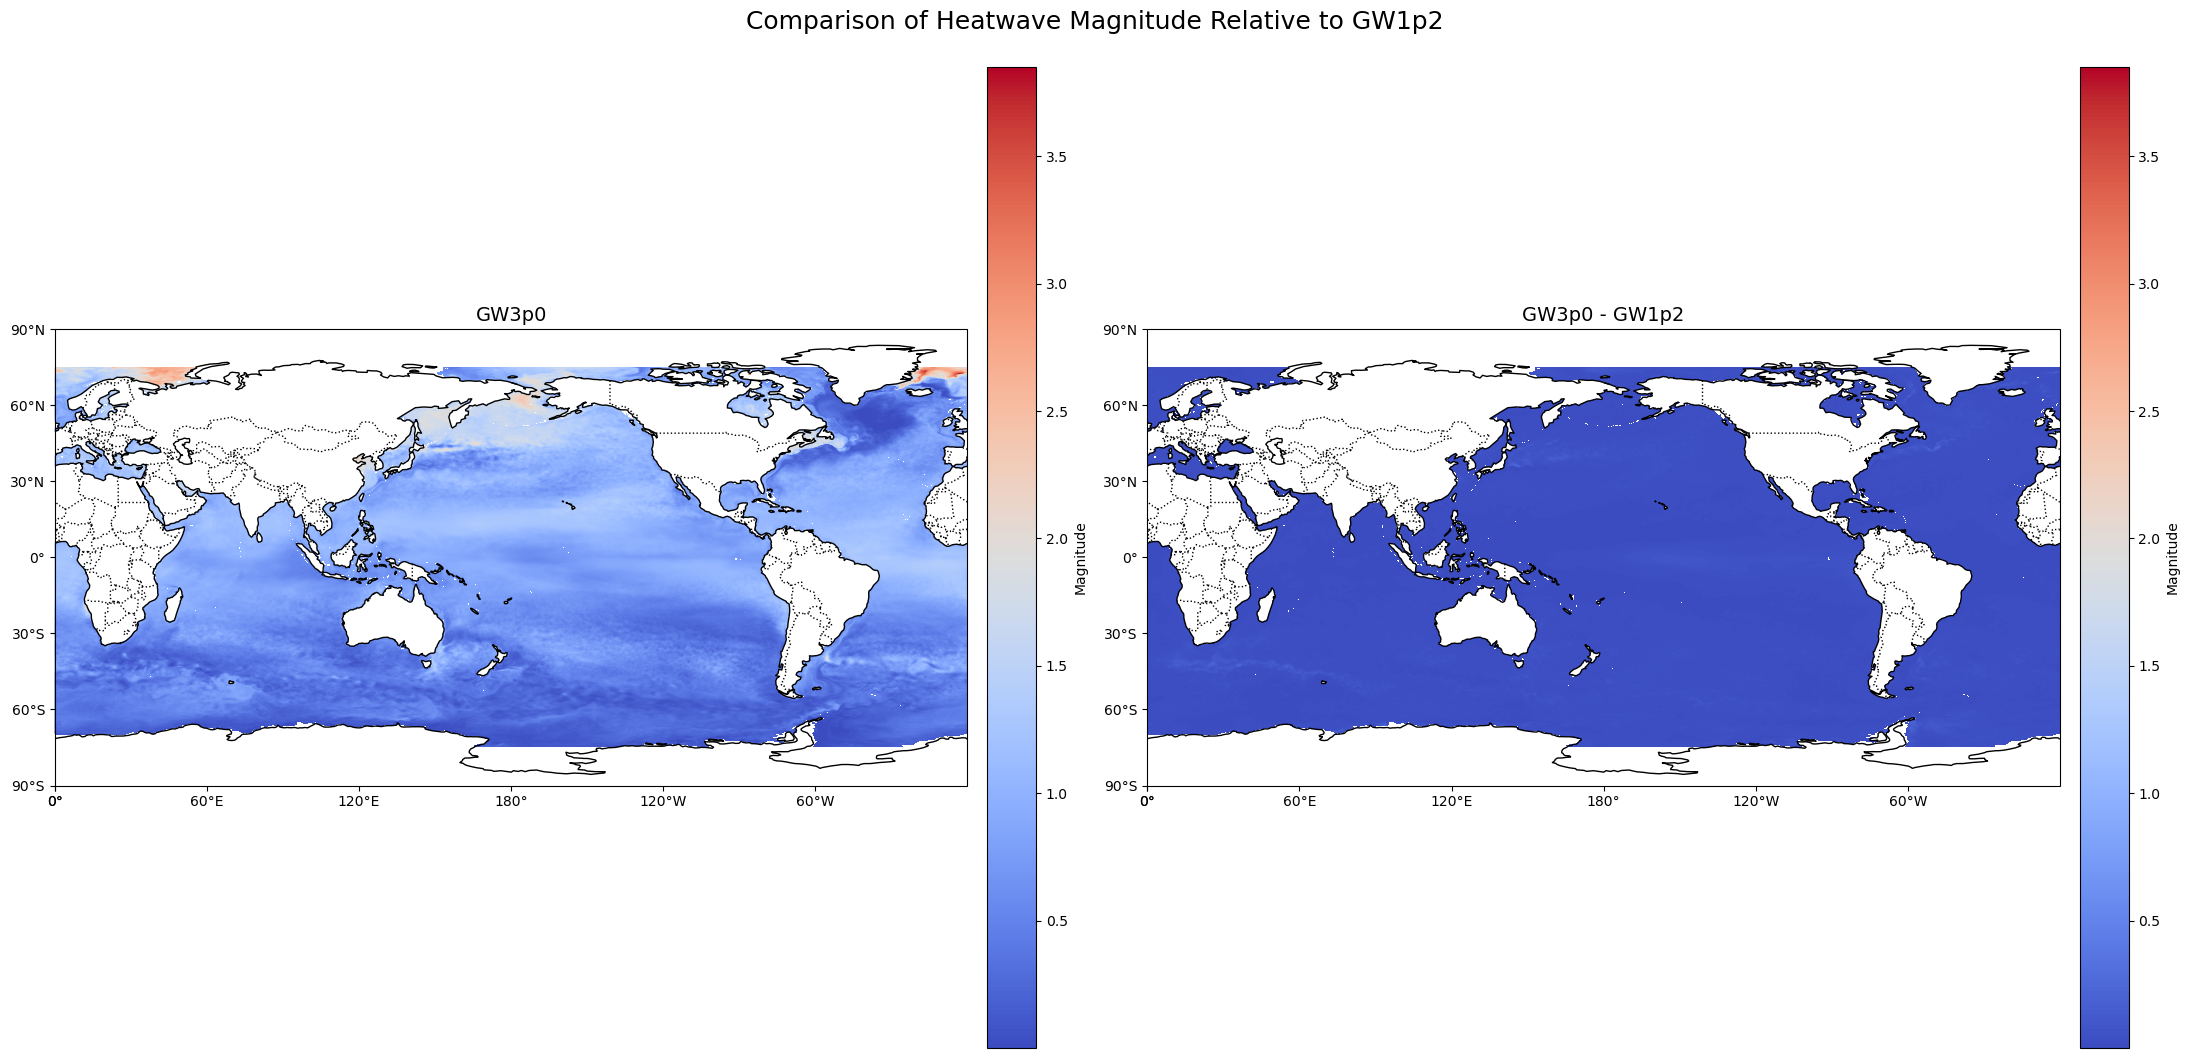

In [68]:
def subplots_variable(means, coords, color_scales, variable, title):
    """
    Create subplots for a specified variable relative to the base period.

    Parameters:
        means (dict): Dictionary with keys as (variable, period) and values as xarray.DataArray of means.
        coords (dict): Dictionary with keys as (variable, period) and values as tuples of longitude and latitude coordinates.
        color_scales (dict): Dictionary with color scales for each variable.
        variable (str): The variable ('duration' or 'magnitude') to plot.
        title (str): The title for the plot.
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 11), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
    fig.suptitle(title, fontsize=18)

    vmin, vmax = color_scales[variable]

    for ax, period, subplot_title in zip([ax1, ax2, ax3, ax4], periods, ['Base Period', 'GW1p5 - GW1p2', 'GW2p0 - GW1p2', 'GW3p0 - GW1p2']):
        if period == base_period:
            data = means[(variable, period)]
        else:
            data = means[(variable, period)] - means[(variable, base_period)]
       
        lon, lat = coords[(variable, period)]

        # Ensure the data is 2D
        if len(data.shape) == 2 and data.shape == (lat.size, lon.size):
            img = ax.pcolormesh(lon, lat, data, cmap='coolwarm', vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
        else:
            raise ValueError(f"Data shape {data.shape} does not match coordinates shape {(lat.size, lon.size)}")

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.set_title(subplot_title, fontsize=14)
        
        # Set ticks and labels for latitude and longitude
        ax.set_xticks(np.arange(0, 361, 60), crs=ccrs.PlateCarree())
        ax.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W', '0°'])
        ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
        ax.set_yticklabels(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N'])

        cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.02, fraction=0.05)
        cbar.set_label(variable.capitalize())

    plt.tight_layout()
    plt.show()

# Plotting
subplots_variable(means, coords, color_scales, 'duration', 'Comparison of Heatwave Duration Relative to GW1p2')
subplots_variable(means, coords, color_scales, 'magnitude', 'Comparison of Heatwave Magnitude Relative to GW1p2')